In [2]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

Welcome to JupyROOT 6.14/06


In [4]:
files = ["$HOME/fjpythia/output/826.root"]
a = getDataPart(files)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]

#d = applyCut(a, 'pt_quark > 4', 'pt_quark > 4')
#d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
#d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(a, 'pt_jet > 0.25', 'pt_jet > 0.25') # removes masked electrons
#d.eval('id_part_abs = abs(id_part)', inplace=True)
#d.eval('id_lead_part_abs = abs(id_lead_part)', inplace=True)


Processed $HOME/fjpythia/output/826.root in 43.0 seconds
pt_jet > 0.25 6696107  fraction kept: 89.9


In [6]:
print a

         id_quark  id_part        Q2  eta_electron    evid   pT_part  \
0              -2       11  3.283918     -3.082515       0  0.000002   
1              -2     -211  3.283918     -3.082515       0  0.452262   
2              -2       22  3.283918     -3.082515       0  0.544662   
3              -2     2212  3.283918     -3.082515       0  1.143397   
4              -2     -211  3.283918     -3.082515       0  0.525366   
5               1       11  9.699579     -2.435795       1  0.000003   
6               1      211  9.699579     -2.435795       1  0.252528   
7               1     -321  9.699579     -2.435795       1  0.254322   
8               1     -211  9.699579     -2.435795       1  0.360189   
9               1      211  9.699579     -2.435795       1  0.559872   
10              1      211  9.699579     -2.435795       1  0.573994   
11              1      130  9.699579     -2.435795       1  0.399742   
12              1      211  9.699579     -2.435795       1  0.38

In [5]:
print d

         id_quark  id_part        Q2  eta_electron    evid   pT_part  \
1              -2     -211  3.283918     -3.082515       0  0.452262   
2              -2       22  3.283918     -3.082515       0  0.544662   
3              -2     2212  3.283918     -3.082515       0  1.143397   
4              -2     -211  3.283918     -3.082515       0  0.525366   
6               1      211  9.699579     -2.435795       1  0.252528   
7               1     -321  9.699579     -2.435795       1  0.254322   
8               1     -211  9.699579     -2.435795       1  0.360189   
9               1      211  9.699579     -2.435795       1  0.559872   
10              1      211  9.699579     -2.435795       1  0.573994   
11              1      130  9.699579     -2.435795       1  0.399742   
12              1      211  9.699579     -2.435795       1  0.383863   
13              1     -211  9.699579     -2.435795       1  0.872490   
14              1       22  9.699579     -2.435795       1  0.42

In [27]:
id_table, other_table, other_count = getIdAndCounts(d, 'id_part_abs')
particle_array = getParticle(id_table[0])
particle_array = np.append(particle_array, 'other')
count_array = id_table[1]
count_array = np.append(count_array, other_count)
print id_table
print other_table

[[    22    130    211    321   2112   2212]
 [119142  10696 177600  22756  13798  16736]]
[[  11   12   13   14   16]
 [1093  425  493  472   48]]


([<matplotlib.patches.Wedge at 0x7f9506cce850>,
 [Text(0.56594,0.943245,'$\\gamma$'),
  Text(-0.605098,0.918616,'$K^0_L$'),
  Text(-0.882223,-0.657026,'$\\pi^{+}$/$\\pi^{-}$'),
  Text(0.790683,-0.764735,'$K^{+}$/$K^{-}$'),
  Text(0.989251,-0.481021,'$n$/$\\overline{n}$'),
  Text(1.08051,-0.206142,'$p$/$\\overline{p}$'),
  Text(1.09974,-0.0240758,'other')],
 [Text(0.308695,0.514497,'32.8%'),
  Text(-0.330054,0.501064,'2.9%'),
  Text(-0.481213,-0.358378,'48.9%'),
  Text(0.431282,-0.417128,'6.3%'),
  Text(0.539592,-0.262375,'3.8%'),
  Text(0.58937,-0.112441,'4.6%'),
  Text(0.599856,-0.0131323,'0.7%')])

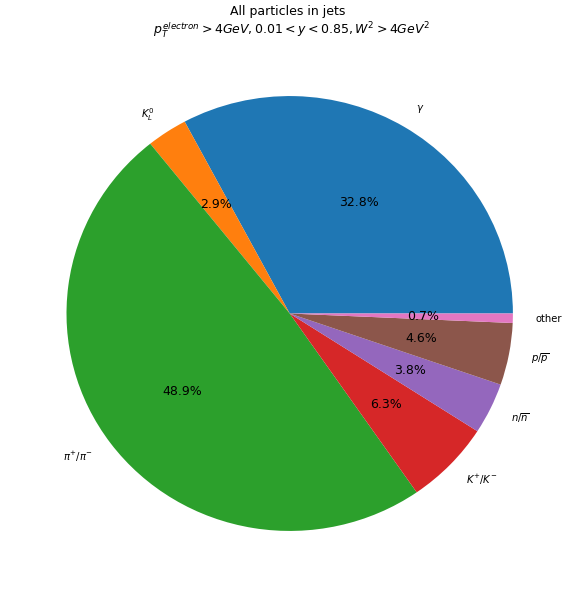

In [28]:
fig = plt.figure(figsize=(10,10))
plt.title('All particles in jets \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [5]:
e = applyCut(d, 'id_quark == 2', 'u quark')

u quark 1039978  fraction kept: 57.5


In [6]:
id_table, other_table, other_count = getIdAndCounts(e, 'id_part_abs')
particle_array = getParticle(id_table[0])
particle_array = np.append(particle_array, 'other')
count_array = id_table[1]
count_array = np.append(count_array, other_count)
print id_table
print other_table

[[    22    130    211    321   2112   2212]
 [351053  27612 515938  61339  37894  43797]]
[[  11   12   13   14   16]
 [2172   55   70   40    8]]


([<matplotlib.patches.Wedge at 0x7f950c174650>,
 [Text(0.537308,0.959844,'$\\gamma$'),
  Text(-0.651215,0.886521,'$K^0_L$'),
  Text(-0.837966,-0.71261,'$\\pi^{+}$/$\\pi^{-}$'),
  Text(0.846259,-0.702742,'$K^{+}$/$K^{-}$'),
  Text(1.01604,-0.421507,'$n$/$\\overline{n}$'),
  Text(1.08822,-0.160543,'$p$/$\\overline{p}$'),
  Text(1.09997,-0.00779231,'other')],
 [Text(0.293077,0.523551,'33.8%'),
  Text(-0.355208,0.483557,'2.7%'),
  Text(-0.457073,-0.388696,'49.6%'),
  Text(0.461596,-0.383314,'5.9%'),
  Text(0.554202,-0.229913,'3.6%'),
  Text(0.593575,-0.0875687,'4.2%'),
  Text(0.599985,-0.00425035,'0.2%')])

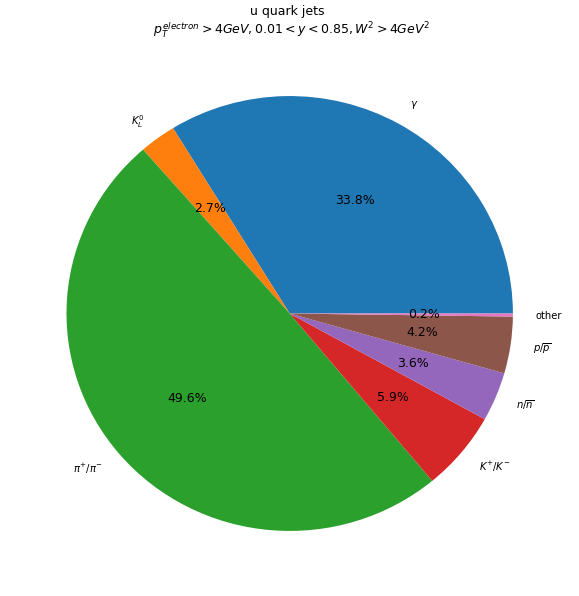

In [7]:
fig = plt.figure(figsize=(10,10))
plt.title('u quark jets \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [9]:
s = getIdAbs(d, 'id_quark', [-3])
s = applyCut(s, 'id_quark == 3', 's/sbar quark')

# correlation cuts
b = getDelta(s, 'quark')
b = applyCut(b, 'delta_pt_quark_abs < 1', 'delta_pt_quark_abs < 1')
b = applyCut(b, 'delta_eta_quark_abs < 0.5', 'delta_eta_quark_abs < 0.5')

id_quark of -3 is changed to positive
s/sbar quark 12359  fraction kept: 3.4
Added colomns for variables of quark jet correlation
delta_pt_quark_abs < 1 3025  fraction kept: 24.5
delta_eta_quark_abs < 0.5 2248  fraction kept: 74.3


In [19]:
id_table, other_table, other_count = getIdAndCounts(s, 'id_part_abs')
particle_array = getParticle(id_table[0])
particle_array = np.append(particle_array, 'other')
count_array = id_table[1]
count_array = np.append(count_array, other_count)
print id_table
print other_table

[[  22  130  211  321 2112 2212]
 [3448  713 5681 1302  542  646]]
[[11 13]
 [26  1]]


([<matplotlib.patches.Wedge at 0x7f9506c6e5d0>,
 [Text(0.70386,0.845329,'$\\gamma$'),
  Text(-0.39097,1.02817,'$K^0_L$'),
  Text(-1.00534,-0.446422,'$\\pi^{+}$/$\\pi^{-}$'),
  Text(0.641054,-0.893895,'$K^{+}$/$K^{-}$'),
  Text(0.975735,-0.507879,'$n$/$\\overline{n}$'),
  Text(1.08263,-0.194699,'$p$/$\\overline{p}$'),
  Text(1.09997,-0.00754959,'other')],
 [Text(0.383924,0.461088,'27.9%'),
  Text(-0.213256,0.560822,'5.8%'),
  Text(-0.548367,-0.243503,'46.0%'),
  Text(0.349666,-0.487579,'10.5%'),
  Text(0.532219,-0.277025,'4.4%'),
  Text(0.590527,-0.106199,'5.2%'),
  Text(0.599986,-0.00411796,'0.2%')])

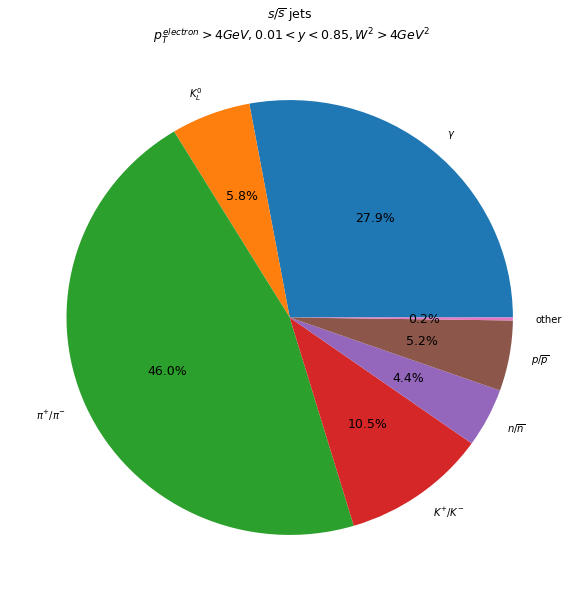

In [20]:
fig = plt.figure(figsize=(10,10))
plt.title('$s$/$\overline{s}$ jets \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})

In [10]:
id_table, other_table, other_count = getIdAndCounts(b, 'id_part_abs')
particle_array = getParticle(id_table[0])
particle_array = np.append(particle_array, 'other')
count_array = id_table[1]
count_array = np.append(count_array, other_count)
print id_table
print other_table

[[  22  130  211  321 2112 2212]
 [ 686  171  939  290   74   85]]
[[11]
 [ 3]]


([<matplotlib.patches.Wedge at 0x7f9506b37cd0>,
 [Text(0.632053,0.900283,'$\\gamma$'),
  Text(-0.607928,0.916746,'$K^0_L$'),
  Text(-0.928464,-0.589877,'$\\pi^{+}$/$\\pi^{-}$'),
  Text(0.71929,-0.832239,'$K^{+}$/$K^{-}$'),
  Text(1.03354,-0.376543,'$n$/$\\overline{n}$'),
  Text(1.09112,-0.139514,'$p$/$\\overline{p}$'),
  Text(1.09999,-0.00461193,'other')],
 [Text(0.344756,0.491063,'30.5%'),
  Text(-0.331597,0.500043,'7.6%'),
  Text(-0.506435,-0.321751,'41.8%'),
  Text(0.39234,-0.453949,'12.9%'),
  Text(0.563752,-0.205387,'3.3%'),
  Text(0.595155,-0.0760984,'3.8%'),
  Text(0.599995,-0.0025156,'0.1%')])

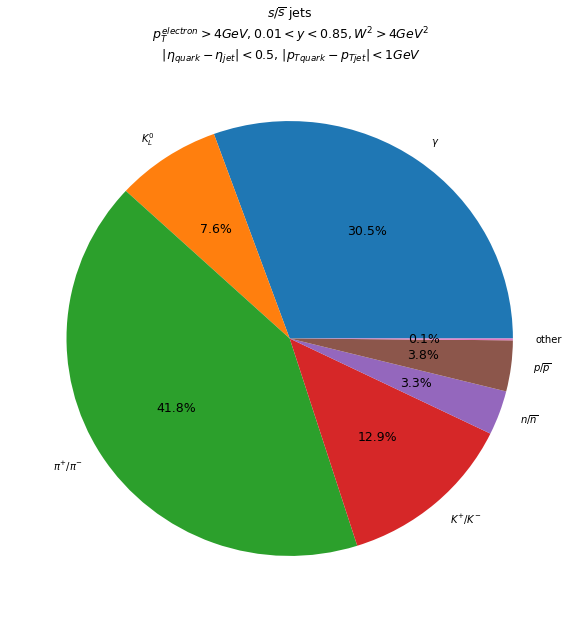

In [22]:
fig = plt.figure(figsize=(10,10))
plt.title('$s$/$\overline{s}$ jets \n $p_T^{electron} > 4 GeV, 0.01 < y < 0.85, W^2 > 4 GeV^2$ \n $|\eta_{quark} - \eta_{jet}| < 0.5$, $|p_{Tquark} -p_{Tjet}| < 1 GeV$', fontsize = 12.5)
plt.pie(count_array, labels=particle_array, autopct='%1.1f%%', textprops={'fontsize': 12.5})